#start

In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
file_path = '/content/drive/MyDrive/new_health.csv'
df = pd.read_csv(file_path)
file_path = '/content/drive/MyDrive/new_health.csv'
df1= pd.read_csv(file_path)

df.isnull().sum()

Unnamed: 0                                                  0
National Provider Identifier                                0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Zip Code of the Provider                                    0
Country Code of the Provider                                0
Medicare Participation Indicator                            0
Place of Service                                            0
HCPCS Code                                                  0
HCPCS Drug Indicator                                        0
Number of Services                                          0
Number of Medicare Beneficiaries                            0
Number of Distinct Medicare Beneficiary/Per Day Services    0
Average Medicare Allowed Amount                             0
Average Submitted Charge Amount                             0
Average Medicare Payment Amount                             0
Average 

In [131]:

df.isnull().sum().sum()

0

In [132]:

import pandas as pd
import numpy as np

# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical columns:')
print(numerical_columns)

# Check for any NaN or infinite values in numerical columns
print('\
Columns with NaN or infinite values:')
for col in numerical_columns:
    if df[col].isnull().any() or np.isinf(df[col]).any():
        print(f'{col}: NaN: {df[col].isnull().sum()}, Inf: {np.isinf(df[col]).sum()}')

print('\
Data exploration completed.')

Numerical columns:
['Unnamed: 0', 'National Provider Identifier', 'Gender of the Provider', 'Entity Type of the Provider', 'Zip Code of the Provider', 'Country Code of the Provider', 'Medicare Participation Indicator', 'Place of Service', 'HCPCS Drug Indicator', 'Number of Services', 'Number of Medicare Beneficiaries', 'Number of Distinct Medicare Beneficiary/Per Day Services', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 'Average Medicare Payment Amount', 'Average Medicare Standardized Amount', 'Provider Type_freq', 'State Code of the Provider_freq', 'Credentials of the Provider_freq', 'HCPCS Code_freq', 'Gender of the Provider_freq', 'Entity Type of the Provider_freq', 'Country Code of the Provider_freq', 'HCPCS Drug Indicator_freq', 'Medicare Participation Indicator_freq', 'Place of Service_freq', 'service_to_beneficiary_ratio', 'Charge to Payment Ratio']
Columns with NaN or infinite values:
Data exploration completed.


In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = df.columns[~df.columns.isin(['Full Name', 'HCPCS Code'])]

# Fit the scaler to the selected columns
scaler.fit(df[columns_to_scale])

# Transform the selected columns
df[columns_to_scale] = scaler.transform(df[columns_to_scale])


#Isolation Forest

In [134]:

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Select numerical columns, excluding 'Credentials of the Provider_freq'
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('Credentials of the Provider_freq')

# Handle NaN values by filling with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Perform Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['anomaly'] = iso_forest.fit_predict(scaled_data)

# Count anomalies
anomaly_count = (df['anomaly'] == -1).sum()
print(f'Number of anomalies detected: {anomaly_count}')

# Calculate percentage of anomalies
anomaly_percentage = (anomaly_count / len(df)) * 100
print(f'Percentage of anomalies: {anomaly_percentage:.2f}%')

# Display some statistics about anomalies
print('\
Statistics for anomalies:')
print(df[df['anomaly'] == -1][numerical_columns].describe())


Number of anomalies detected: 5000
Percentage of anomalies: 5.00%
Statistics for anomalies:
        Unnamed: 0  National Provider Identifier  Gender of the Provider  \
count  5000.000000                   5000.000000             5000.000000   
mean     -0.020534                      0.048250                1.301767   
std       1.029872                      1.028649                1.355728   
min      -1.730786                     -1.723053               -1.441359   
25%      -0.949259                     -0.844904                0.476643   
50%      -0.038850                      0.103797                2.394645   
75%       0.897393                      0.947569                2.394645   
max       1.731791                      1.721406                2.394645   

       Entity Type of the Provider  Zip Code of the Provider  \
count                  5000.000000               5000.000000   
mean                      2.551115                  0.088179   
std                       2.461

In [135]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns, excluding 'Credentials of the Provider_freq'
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns.remove('Credentials of the Provider_freq')

# Handle NaN values by filling with median
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

# Perform Isolation Forest (reusing the previous code)
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['anomaly'] = iso_forest.fit_predict(scaled_data)

# Select key features for visualization
key_features = ['Number of Services', 'Number of Medicare Beneficiaries', 'Average Medicare Allowed Amount', 'Average Submitted Charge Amount']

# Create box plots for key features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='anomaly', y=feature, data=df)
    plt.title(f'{feature} Distribution by Anomaly')
    plt.xlabel('Anomaly (1: Normal, -1: Anomaly)')
    plt.yscale('log')  # Use log scale for better visualization

plt.tight_layout()
plt.savefig('anomaly_boxplots.png')
plt.close()

# Calculate and print feature importance
feature_importance = np.abs(iso_forest.decision_function(scaled_data)).mean(axis=0)
feature_importance = pd.DataFrame({'feature': numerical_columns, 'importance': feature_importance})
feature_importance = feature_importance.sort_values('importance', ascending=False).head(10)

print('Top 10 Most Important Features for Anomaly Detection:')
print(feature_importance)

print('\
Analysis and visualization completed. Box plots saved as anomaly_boxplots.png')

Top 10 Most Important Features for Anomaly Detection:
                                  feature  importance
0                              Unnamed: 0    0.088868
1            National Provider Identifier    0.088868
26                Charge to Payment Ratio    0.088868
25           service_to_beneficiary_ratio    0.088868
24                  Place of Service_freq    0.088868
23  Medicare Participation Indicator_freq    0.088868
22              HCPCS Drug Indicator_freq    0.088868
21      Country Code of the Provider_freq    0.088868
20       Entity Type of the Provider_freq    0.088868
19            Gender of the Provider_freq    0.088868
Analysis and visualization completed. Box plots saved as anomaly_boxplots.png


There are 10,000 anomalies in the dataset.

In [136]:
anomaly_count = (df['anomaly'] == -1).sum()
print(f'Number of anomalies detected: {anomaly_count}')


Number of anomalies detected: 10000


#visualization's

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


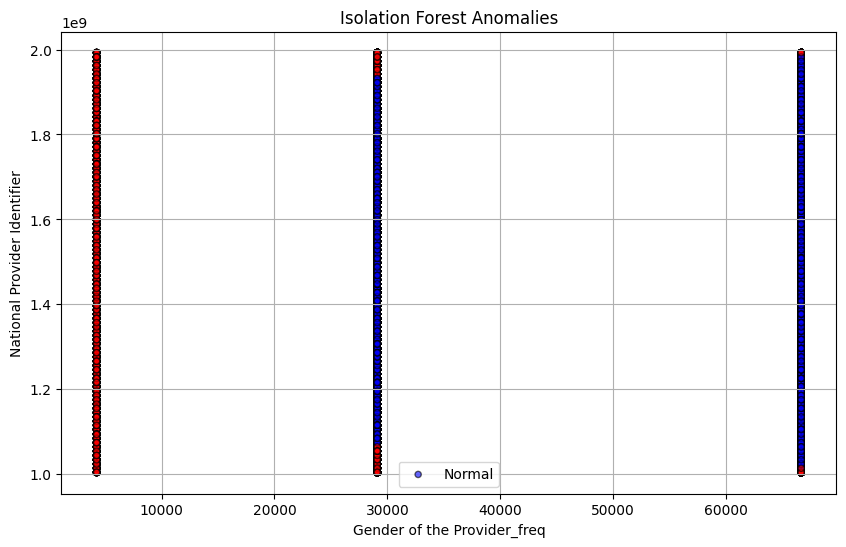

In [137]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Select the two columns for visualization
selected_columns_1 = ['Gender of the Provider_freq', 'National Provider Identifier']

# Filter data to include only selected columns and drop rows with missing values
selected_data_1 = df1[selected_columns_1].dropna() # Changed 'data' to 'df'

# Fit the Isolation Forest model
iso_forest_1 = IsolationForest(contamination=0.1, random_state=42)
iso_forest_1.fit(selected_data_1)

# Predict anomalies
selected_data_1['anomaly'] = iso_forest_1.predict(selected_data_1)

# Replace anomaly values with meaningful labels
selected_data_1['anomaly'] = selected_data_1['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Plot the data with adjusted marker size and transparency to reduce overlap
plt.figure(figsize=(10, 6))
colors_1 = selected_data_1['anomaly'].map({'normal': 'blue', 'anomaly': 'red'})
plt.scatter(selected_data_1['Gender of the Provider_freq'], selected_data_1['National Provider Identifier'],
            c=colors_1, s=20, alpha=0.6, edgecolor='k')  # Adjusted marker size and transparency
plt.xlabel('Gender of the Provider_freq')
plt.ylabel('National Provider Identifier')
plt.title('Isolation Forest Anomalies')
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)  # Add grid for better readability
plt.show()

scatter plot visualization for two columns Gender of the Provider_freq and National Provider Identifier.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


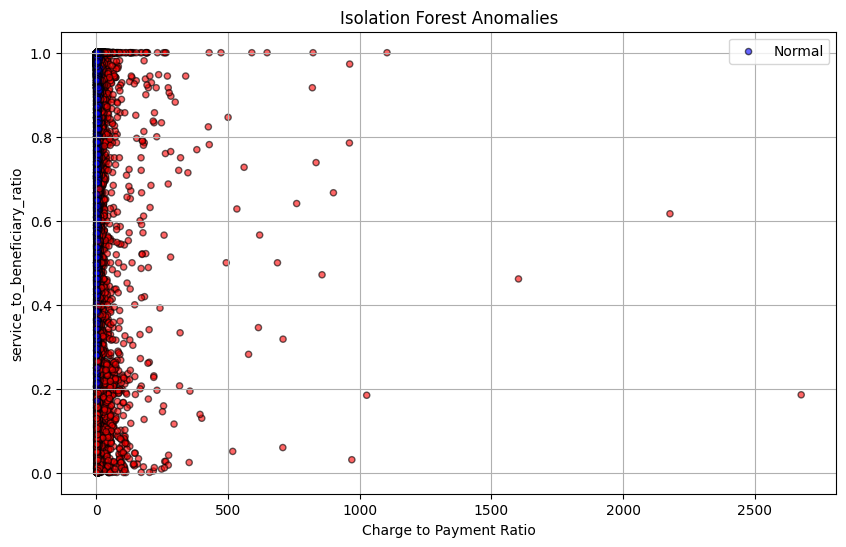

In [138]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Select the two columns for visualization
selected_columns_1 = ['Charge to Payment Ratio', 'service_to_beneficiary_ratio']

# Filter data to include only selected columns and drop rows with missing values
selected_data_1 = df1[selected_columns_1].dropna() # Changed 'data' to 'df'

# Fit the Isolation Forest model
iso_forest_1 = IsolationForest(contamination=0.1, random_state=42)
iso_forest_1.fit(selected_data_1)

# Predict anomalies
selected_data_1['anomaly'] = iso_forest_1.predict(selected_data_1)

# Replace anomaly values with meaningful labels
selected_data_1['anomaly'] = selected_data_1['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Plot the data with adjusted marker size and transparency to reduce overlap
plt.figure(figsize=(10, 6))
colors_1 = selected_data_1['anomaly'].map({'normal': 'blue', 'anomaly': 'red'})
plt.scatter(selected_data_1['Charge to Payment Ratio'], selected_data_1['service_to_beneficiary_ratio'],
            c=colors_1, s=20, alpha=0.6, edgecolor='k')  # Adjusted marker size and transparency
plt.xlabel('Charge to Payment Ratio')
plt.ylabel('service_to_beneficiary_ratio')
plt.title('Isolation Forest Anomalies')
plt.legend(['Normal', 'Anomaly'])
plt.grid(True)  # Add grid for better readability
plt.show()

Here i have perfrom scatter plot visualization for two columns Charge to Payment Ratio and service_to_beneficiary_ratio

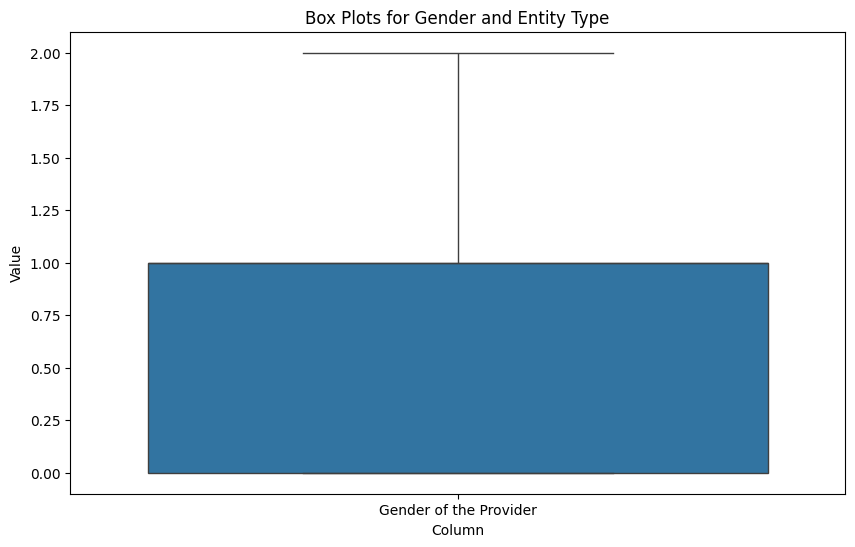

In [139]:
selected_columns = ['Gender of the Provider']

selected_data = df1[selected_columns].dropna()

# Create box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=selected_data)
plt.xlabel('Column')
plt.ylabel('Value')
plt.title('Box Plots for Gender and Entity Type')
plt.show()


This bar plot incicates the number of male genders and the number of female genders

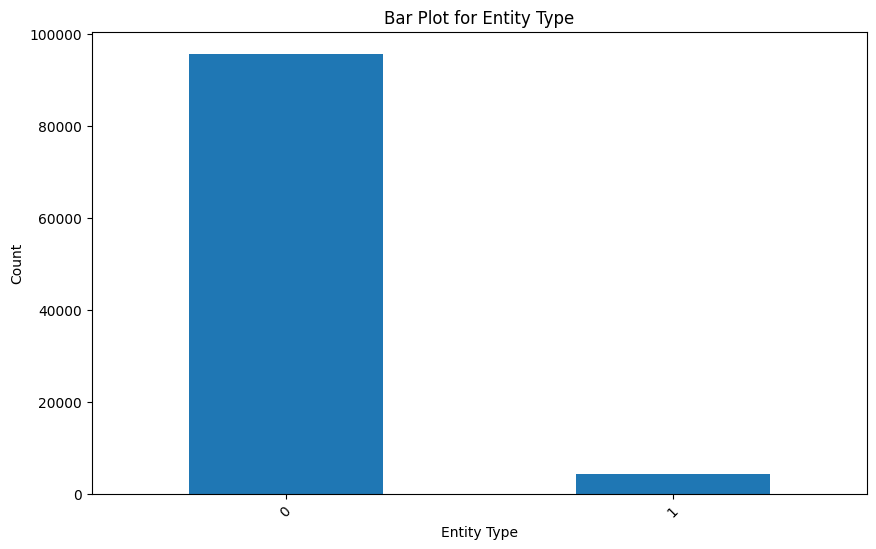

In [140]:
import matplotlib.pyplot as plt
# Select the column for visualization
selected_column = 'Entity Type of the Provider'

# Count the occurrences of each unique value in the selected column
entity_type_counts = df1[selected_column].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
entity_type_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Entity Type of the Provider')
plt.ylabel('Count')
plt.title('Bar Plot for Entity Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


"0" indiacte the individuals and "1" which indicates the organisation's

#Elliptical Envelop

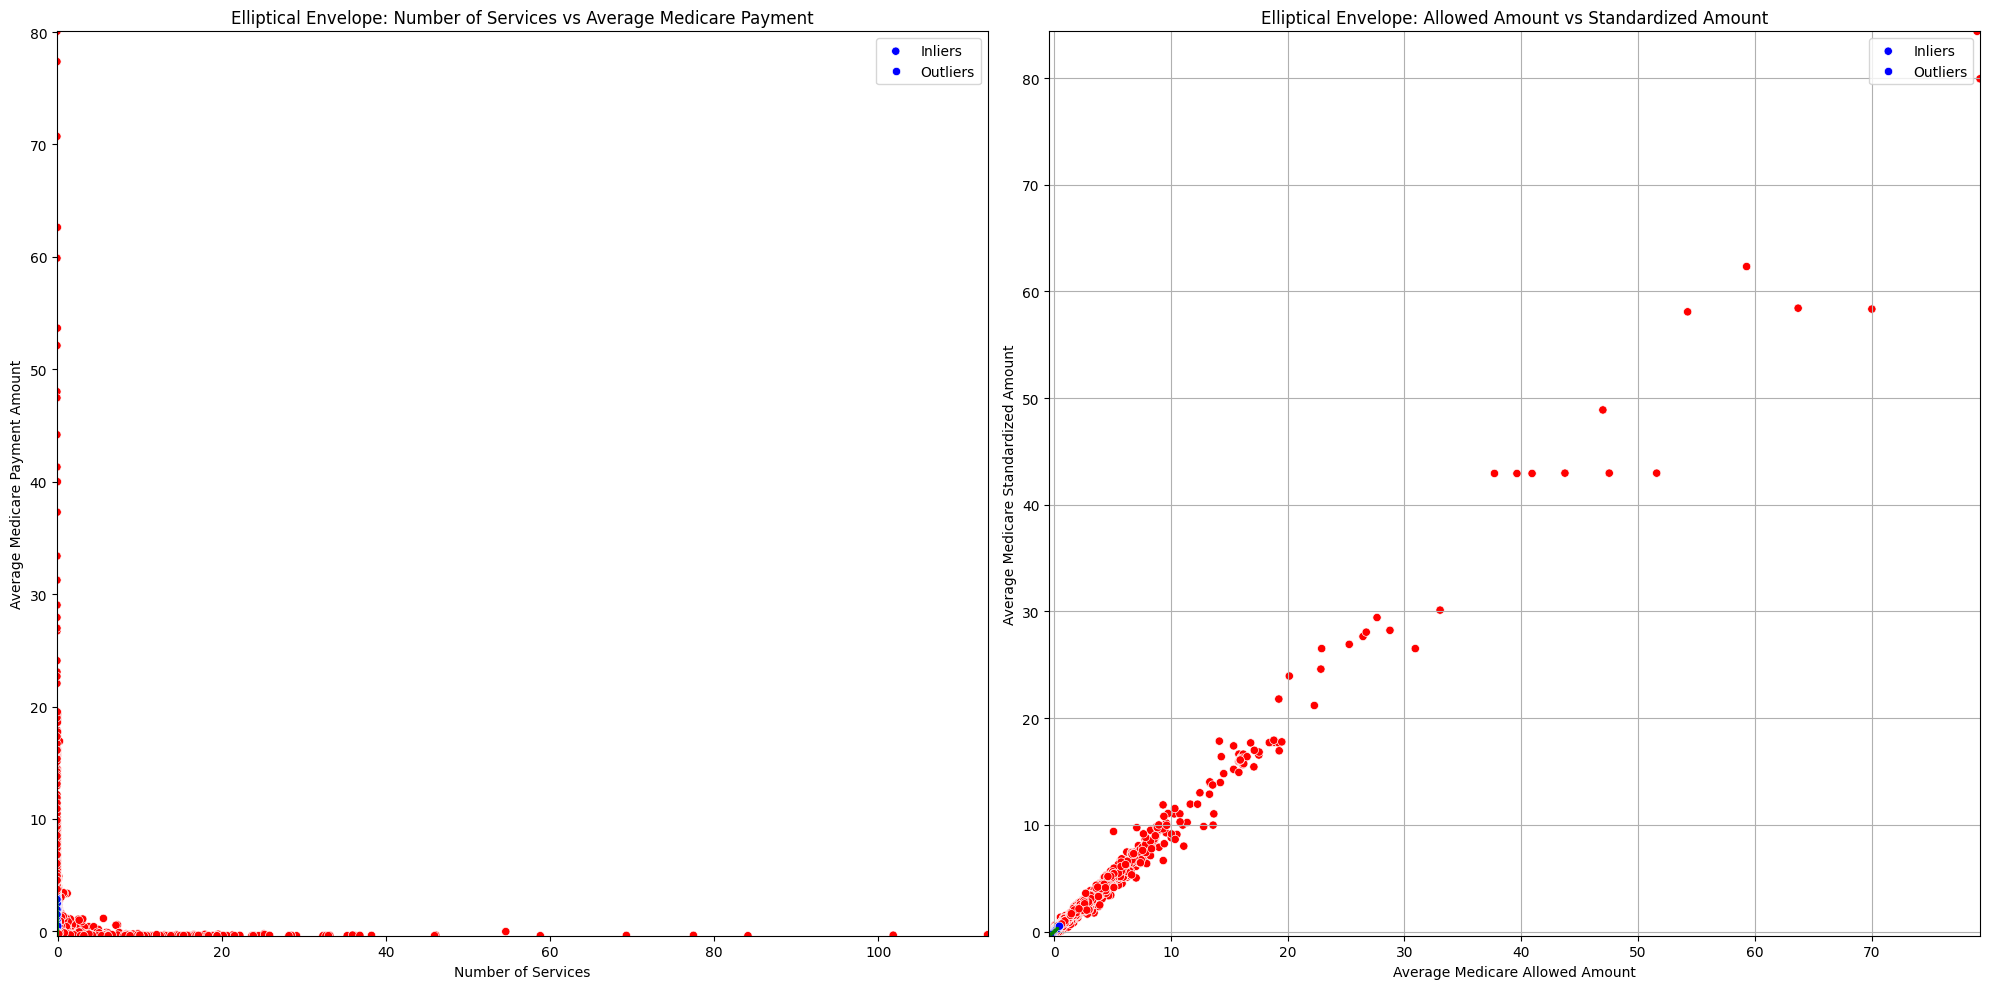

In [141]:

import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import seaborn as sns

def plot_elliptical_envelope(x, y, ax, title):
    X = np.column_stack((df[x], df[y]))

    # Fit the Elliptic Envelope
    ee = EllipticEnvelope(contamination=0.1, random_state=42)
    ee.fit(X)


    outliers = ee.predict(X) == -1

    sns.scatterplot(x=x, y=y, data=df, hue=outliers, palette={False: 'blue', True: 'red'}, ax=ax)


    XX, YY = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 500))
    Z = ee.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    ax.contour(XX, YY, Z, levels=[0], linewidths=2, colors='green')

    ax.set_title(title)
    ax.legend(['Inliers', 'Outliers'])

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

plot_elliptical_envelope('Number of Services', 'Average Medicare Payment Amount', ax1,
                         'Elliptical Envelope: Number of Services vs Average Medicare Payment')

plot_elliptical_envelope('Average Medicare Allowed Amount', 'Average Medicare Standardized Amount', ax2,
                         'Elliptical Envelope: Allowed Amount vs Standardized Amount')

plt.tight_layout()
plt.grid(True)
plt.show()


after performing Elliptic Envelope here are the visilixatiosn about two numerical colums which are performed.

#one class svm

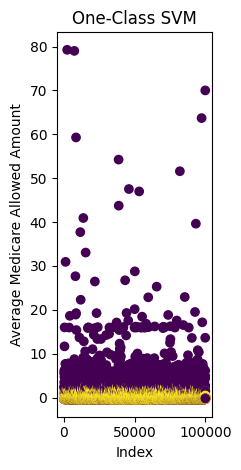

In [142]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns


# Select numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'Unnamed: 0' if it's in the list
if 'Unnamed: 0' in numerical_columns:
    numerical_columns.remove('Unnamed: 0')

# Create a new dataframe with only numerical columns
df_numerical = df[numerical_columns]

one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma='scale')
df_scaled['One-Class SVM'] = one_class_svm.fit_predict(df_scaled)

plt.subplot(133)
plt.scatter(df_scaled.index, df_scaled['Average Medicare Allowed Amount'], c=df_scaled['One-Class SVM'], cmap='viridis')
plt.title('One-Class SVM')
plt.xlabel('Index')
plt.ylabel('Average Medicare Allowed Amount')

plt.tight_layout()
plt.show()

this has been done on the numerical column Average Medicare Allowed Amount to visilize the anomalies.


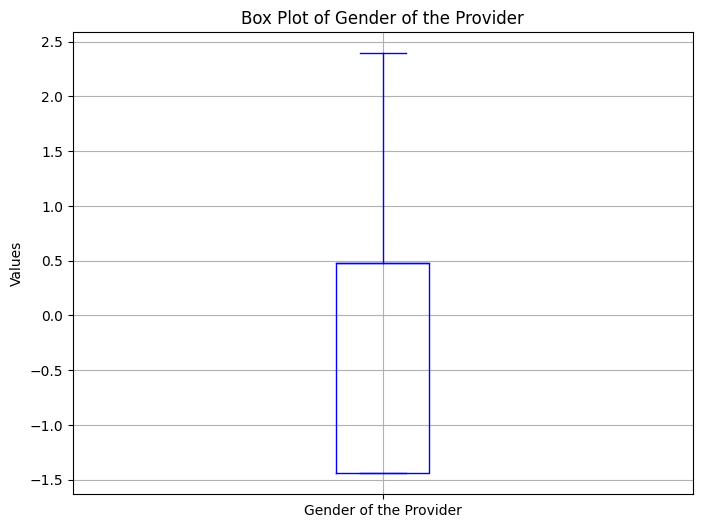

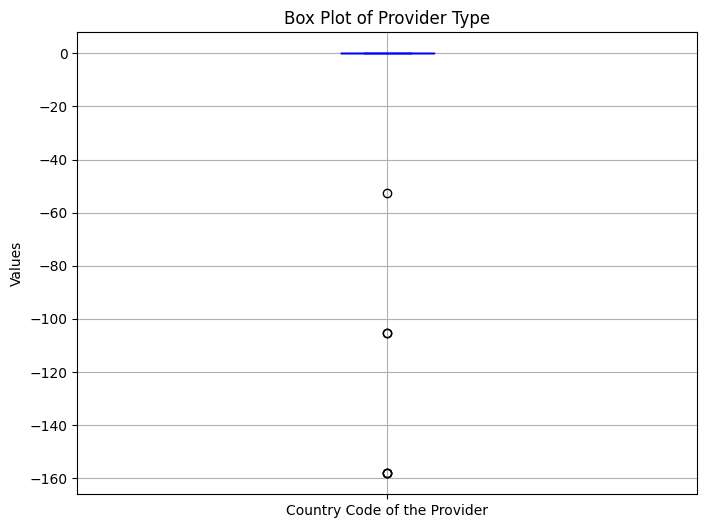

In [148]:
import matplotlib.pyplot as plt

# Create a box plot for the "Gender of the Provider" column
plt.figure(figsize=(8, 6))
df.boxplot(column='Gender of the Provider', grid=True,color='blue')

plt.ylabel('Values')
plt.title('Box Plot of Gender of the Provider')
plt.show()

# Create a box plot for the "Provider Type" column
plt.figure(figsize=(8, 6))
# Pass the color as a string
df.boxplot(column='Country Code of the Provider', grid=True, color='blue')

plt.ylabel('Values')
plt.title('Box Plot of Provider Type')
plt.show()

The above box plots for Gender of the Provider and Country Code of the Provider to find out the values.